In [403]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

read from pickle & start at cell **"Starting to work with years"** OR import csv

In [404]:
# # # READ OBJECT FROM PICKLE  
# with open("emotions.pkl", 'rb') as picklefile: 
#     emotions = pickle.load(picklefile)

In [287]:
import pandas as pd
emotions = pd.read_csv('average_emotions.csv', index_col='Object ID')
emotions.head()

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
Object ID,,,,,,,,,,,,,
10056,Hunter (from McGuire Scrapbook),William Apthorp Adams,1797–1878,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.000,0.000,0.206,0.792,0.001,0.000
10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.000,0.000,0.000,0.987,0.011,0.000
10064,James McNeill Whistler,John White Alexander,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,0.002,0.001,0.001,0.000,0.001,0.836,0.159,0.000
10070,The Spanish Girl in Reverie,Washington Allston,1831,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.000,0.000,0.001,0.998,0.000,0.000
10071,The Stoning of Saint Stephen,Washington Allston,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.003,0.000,0.002,0.004,0.978,0.004,0.009


In [264]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29462 entries, 10056 to 298968
Data columns (total 13 columns):
Title                  29175 non-null object
Artist Display Name    27722 non-null object
Object Date            28802 non-null object
Classification         29462 non-null object
Link Resource          29462 non-null object
Avg. Anger             29462 non-null float64
Avg. Contempt          29462 non-null float64
Avg. Disgust           29462 non-null float64
Avg. Fear              29462 non-null float64
Avg. Happiness         29462 non-null float64
Avg. Neutral           29462 non-null float64
Avg. Sadness           29462 non-null float64
Avg. Surprise          29462 non-null float64
dtypes: float64(8), object(5)
memory usage: 3.1+ MB


In [288]:
emotions['Object Date']=emotions['Object Date'].astype(str)
emotions=emotions[emotions['Object Date']!='nan']

In [256]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28802 entries, 10056 to 298968
Data columns (total 13 columns):
Title                  28536 non-null object
Artist Display Name    27073 non-null object
Object Date            28802 non-null object
Classification         28802 non-null object
Link Resource          28802 non-null object
Avg. Anger             28802 non-null float64
Avg. Contempt          28802 non-null float64
Avg. Disgust           28802 non-null float64
Avg. Fear              28802 non-null float64
Avg. Happiness         28802 non-null float64
Avg. Neutral           28802 non-null float64
Avg. Sadness           28802 non-null float64
Avg. Surprise          28802 non-null float64
dtypes: float64(8), object(5)
memory usage: 3.1+ MB


In [106]:
len(emotions[emotions['Object Date'].str.len()==4])

14764

In [73]:
emotions.iloc[10071,:]

Title                  Johnny Sain, part of the 1949 Bowman Baseball ...
Artist Display Name                                   Bowman Gum Company
Object Date                                                         1949
Classification                                           Prints|Ephemera
Link Resource          http://www.metmuseum.org/art/collection/search...
Avg. Anger                                                         0.554
Avg. Contempt                                                      0.001
Avg. Disgust                                                       0.041
Avg. Fear                                                              0
Avg. Happiness                                                     0.003
Avg. Neutral                                                       0.133
Avg. Sadness                                                           0
Avg. Surprise                                                      0.267
dt                                                 

### Number of artworks

In [107]:
len(emotions)

28802

### Number of unique values in the date col; oh boy

In [108]:
emotions['Object Date'].unique()

array(['1797–1878', 'ca. 1839', '1831', ...,
       'Second half of the 18th century (segunda mitad del siglo XVIII)',
       '2008', '1854–57'], dtype=object)

In [109]:
emotions['Object Date'].nunique()

3589

### Number of works with no date information

In [110]:
len(emotions[emotions['Object Date']=='nan'])

0

### Number of items with exactly 4 digit year as the date:

In [111]:
len(emotions[emotions['Object Date'].str.len()==4])

14764

### Number of items that exact match "ca. XXXX" pattern

In [112]:
for omg in emotions['Object Date'].unique():
    print(omg)

1797–1878
ca. 1839
1831
ca. 1820
ca. 1810
1869
1760
1899
1875
1861–63
1914
1894
1898
ca. 1890
1925
ca. 1775–85
ca. 1771–76
ca. 1770–73
ca. 1770–72
ca. 1780
ca. 1830
1817
after 1833
1785
1754
ca. 1762–63
1865
1927
1921
ca. 1844
ca. 1805
ca. 1825
1843
1870
ca. 1845
1786
1801
1905
1903
1890
1896
ca. 1910–15
1844
ca. 1904
1902
1883–85
1906
ca. 1899
1896–97
ca. 1903
1878
1900
1827
ca. 1860
ca. 1895
1885
1888
ca. 1902
ca. 1843
ca. 1840
ca. 1835
1835–40
ca. 1890–1900
1885–1903
1840
1916
1771
ca. 1769
ca. 1767–70
1782
ca. 1767–69
1767–69
ca. 1763
1773
1765
1766
ca. 1770
1783
1800–1802
1798
1935
ca. 1880–81
1835
1845
ca. 1850
1856
ca. 1856
1839
ca. 1849
1863
before 1926
ca. 1827
ca. 1817
ca. 1808
ca. 1807
1820–22
1854
1852
1804
1814
1846
ca. 1847
ca. 1795
1776
1829
1841
ca. 1766–68
ca. 1768–70
ca. 1905
ca. 1700
ca. 1710
ca. 1884–89
1875–76
1881
1901–2
1789
ca. 1791
ca. 1783–84
1837
1808
1859
1857
1850
1746
1932
1865–80
ca. 1848
1799
ca. 1800
1893–1907
1825
1825–30
1833
1819
ca. 1812–16
ca. 1867

1502
ca. 1390–96
1491
ca. 1488
ca. 1487–88
ca. 1435
ca. 1478
ca. 1520–25
1787–88
ca. 1595–1600
possibly 1780s
late 1780s
ca. 1780–82
after 1743–49
ca. 1636–38
ca. 1616–17
early 1650s
ca. 1650, reworked probably 18th century
probably 1650s
1536
1532–35
early 1540s
ca. 1540–45
1535
ca. 1540
ca. 1657–58
ca. 1670
probably 1805
dated 1871
ca. 1824–34
ca. 1850–60
ca. 1515–20
second quarter 16th century
1480s
probably ca. 1544
ca. 1690–95
1696
1727
ca. 1824–25
possibly late 1870s
1670s
shortly after 1342
ca. 1408–10
1520s
1882–83
1879–82
shortly after 1450
ca. 1340
ca. 1520
ca. 1485–90
ca. 1330
probably late 1490s
1574
1490s
shortly after 1553
ca. 1665–72
ca. 1650–55
early 1670s
ca. 1518
ca. 1460
1370s
ca. 1491–95
ca. 1442
ca. 1808–9
ca. 1815–16
mid-1650s
ca. 1655–60
probably ca. 1658–62
ca. 1716–24
1693
1776–78
ca. 1787–91
ca. 1608–9
ca. 1625–27
ca. 1616
1528–30
ca. 1445–50
1540s
ca. 1311
ca. 1320
late 1480s
ca. 1505–7
ca. 1317–19
ca. 1670 or slightly later
ca. 1680
ca. 1690
probably 1731 or

ca. 1915–32
ca. 1924–40
May 1864
1906–7
1480–1500
1681
1939–1940
ca. 1500–1504
1607
1910–1915
ca. 1756
ca. 1635–36
1920–30
ca. 1927–33
ca. 1930–60
ca. 1923–50
ca. 1920–55
ca. 1917–35
1975, printed 1986
1940–1941
ca. 1380
possibly 1496–1502
947
ca. 1915–29
ca. 1866, printed 1940s
December 1863
December 22, 1860
probably 1561
ca. 1573–82
ca. 1458–61
ca. 1930–35
February 9, 1861
ca. 1701–1703 
possibly ca. 1880–85
ca. 1789–90
ca. 1922–27
July 11, 1868
November 1, 1803
2004
1951–1952
Second half of the 18th century (segunda mitad del siglo XVIII)
2008
1854–57


In [113]:
import re
strict_circa_year = re.compile('^ca. \d{4}$')

In [114]:
emotions['Object Date'].str.match(strict_circa_year).sum()

3860

In [115]:
emotions[emotions['Object Date'].str.match(strict_circa_year)]

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise,yearapprox
Object ID,,,,,,,,,,,,,,
10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.0,0.000,0.000,0.987,0.011,0.000,NaN
10074,Maurice Levy,Ezra Ames,ca. 1820,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.000,0.001,0.995,0.003,0.000,NaN
10075,Philip Van Cortlandt,Ezra Ames,ca. 1810,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.000,0.012,0.987,0.000,0.000,NaN
10132,The Veronese Print,J. Carroll Beckwith,ca. 1890,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.000,0.119,0.876,0.001,0.005,NaN
10139,Portrait of a Gentleman,Henry Benbridge,ca. 1780,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.000,0.003,0.996,0.001,0.000,NaN
10164,Bishop William White,William Russell Birch,ca. 1830,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.002,0.0,0.000,0.012,0.984,0.002,0.000,NaN
10210,Emma Homan,John Bradley,ca. 1844,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.000,0.000,1.000,0.000,0.000,NaN
10217,Captain Graham,Andrew Robertson,ca. 1805,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.021,0.0,0.000,0.009,0.969,0.001,0.000,NaN
10218,Carolyn Mishner,Hugh Bridport,ca. 1825,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.011,0.0,0.000,0.062,0.926,0.000,0.000,NaN


### exact maches: XXXXs

In [116]:
decade_given=re.compile('^\d{4}s$')
#emotions[emotions['Object Date'].str.match(decade_given)]
len(emotions[emotions['Object Date'].str.match(decade_given)])

1413

### XXXXs-XXs ... and XXXXs-XXXXs

In [117]:
range_decades=re.compile('^\d{4}s')
emotions[emotions['Object Date'].str.match(range_decades)]
#len(emotions[emotions['Object Date'].str.match(range_decades)])

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise,yearapprox
Object ID,,,,,,,,,,,,,,
12109,Hercules Brabazon Brabazon,John Singer Sargent,1890s,Drawings,http://www.metmuseum.org/art/collection/search...,0.007,0.000,0.000,0.000,0.002,0.987,0.002,0.001,NaN
16166,Carey Ambler,Virginia Hendrickson Irvin,1950s,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,NaN
19376,Portrait of a Boy,NaN,1840s,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.000,0.000,0.210,0.790,0.000,0.000,NaN
259699,Alexander Jensen Low,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.001,0.003,0.000,0.000,0.004,0.992,0.000,0.000,NaN
259701,Jared French,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.005,0.001,0.000,0.000,0.000,0.993,0.000,0.001,NaN
259705,Tony Carluccio,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.001,0.032,0.000,0.000,0.062,0.905,0.001,0.000,NaN
259708,Vilhjálmur Stefansson,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.002,0.267,0.000,0.000,0.000,0.728,0.003,0.000,NaN
259709,W. Somerset Maugham,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.019,0.002,0.000,0.000,0.000,0.974,0.006,0.000,NaN
259713,[Woman Leaning on Sill: Dress Designer],George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.000,0.000,0.008,0.991,0.000,0.000,NaN


# Starting to work with years  
quick and dirty assignment of year

In [391]:
emotions.head()

,yearapprox,Object ID,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise,intyears
0,1797-01-01 00:00:00,10056,Hunter (from McGuire Scrapbook),William Apthorp Adams,1797–1878,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.206,0.792,0.001,0.0,1797
1,1839-01-01 00:00:00,10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.0,0.0,0.000,0.987,0.011,0.0,1839
2,1831-01-01 00:00:00,10070,The Spanish Girl in Reverie,Washington Allston,1831,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,0.001,0.998,0.000,0.0,1831
3,1820-01-01 00:00:00,10074,Maurice Levy,Ezra Ames,ca. 1820,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.001,0.995,0.003,0.0,1820
4,1810-01-01 00:00:00,10075,Philip Van Cortlandt,Ezra Ames,ca. 1810,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.012,0.987,0.000,0.0,1810


In [369]:
emotions['yearapprox']=emotions['Object Date']

In [370]:
# I used your method :) 
pattern = r'([0-9]{4})'
emotions['yearapprox']=emotions['Object Date'].str.extract(pattern)

In [371]:
# DROP NULLS
emotions=emotions[emotions['yearapprox'].notnull()]

In [402]:
len(emotions)

27092

In [372]:
# have one column of years as ints
emotions['intyears']=[int(x) for x in emotions['yearapprox']]

In [373]:
#one col of years as datetime obj
emotions['yearapprox']=[datetime.strptime(x, '%Y') for x in emotions['yearapprox']]

#### save dataframe

In [374]:
import pickle
# DUMP OBJECT INTO PICKLE
with open('emotions.pkl', 'wb') as picklefile:
    pickle.dump(emotions, picklefile)

In [376]:
mybins=[1100,1200,1300,1400,1500,1600, 1650, 1700,1750,1800,1850,1900,1950,2000,2050]

In [393]:
# eh...
#r = pd.period_range('1600-01-01', '2019-01-01', freq='Y')
#r

#### Years start at 1100!! :O!!!

In [381]:
sorted(emotions['yearapprox'])

[datetime.datetime(1100, 1, 1, 0, 0),
 datetime.datetime(1107, 1, 1, 0, 0),
 datetime.datetime(1129, 1, 1, 0, 0),
 datetime.datetime(1129, 1, 1, 0, 0),
 datetime.datetime(1195, 1, 1, 0, 0),
 datetime.datetime(1230, 1, 1, 0, 0),
 datetime.datetime(1266, 1, 1, 0, 0),
 datetime.datetime(1275, 1, 1, 0, 0),
 datetime.datetime(1311, 1, 1, 0, 0),
 datetime.datetime(1315, 1, 1, 0, 0),
 datetime.datetime(1315, 1, 1, 0, 0),
 datetime.datetime(1317, 1, 1, 0, 0),
 datetime.datetime(1317, 1, 1, 0, 0),
 datetime.datetime(1317, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1320, 1, 1, 0, 0),
 datetime.datetime(1325, 1, 1, 0, 0),
 datetime.datetime(1325, 1, 1, 0, 0),
 datetime.datetime(1325, 1, 1, 0, 0),
 datetime.datetime(1326, 1, 1, 0, 0),
 datetime.datetime(1326, 1, 1, 0, 0),
 datetime.datetime(1330, 1, 1, 0, 0),
 datetime.da

In [385]:
groups=emotions.groupby(pd.cut(emotions.intyears, mybins))

In [400]:
groups.yearapprox.count()

intyears
(1100, 1200]       4
(1200, 1300]       3
(1300, 1400]      55
(1400, 1500]     331
(1500, 1600]    1115
(1600, 1650]     839
(1650, 1700]     543
(1700, 1750]     392
(1750, 1800]    1353
(1800, 1850]    1682
(1850, 1900]    8852
(1900, 1950]    9104
(1950, 2000]    2764
(2000, 2050]      54
Name: yearapprox, dtype: int64

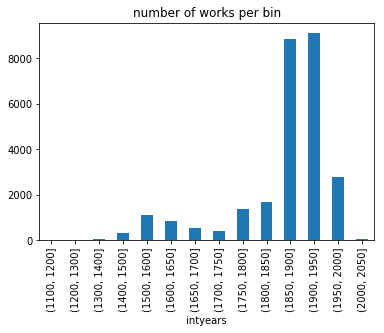

In [401]:
pd.DataFrame(groups.yearapprox.count()).plot(kind='bar', title='number of works per bin', legend=False)

In [394]:
emotions.columns #printing so I can copy & paste hehe

Index(['yearapprox', 'Object ID', 'Title', 'Artist Display Name',
       'Object Date', 'Classification', 'Link Resource', 'Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise', 'intyears'],
      dtype='object')

### Here we have the avg of the avg for each BIN (note that some bins are centuries and some are only 50 years!)

In [395]:
groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].mean()

,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
intyears,,,,,,,,
"(1100, 1200]",0.284250,0.000750,0.001500,0.038000,0.023750,0.553000,0.005500,0.093500
"(1200, 1300]",0.000333,0.026000,0.000000,0.000333,0.002667,0.958333,0.001667,0.011333
"(1300, 1400]",0.008164,0.008127,0.002800,0.000600,0.013691,0.894564,0.060327,0.011891
"(1400, 1500]",0.006417,0.005813,0.001369,0.001940,0.031160,0.893003,0.047296,0.012976
"(1500, 1600]",0.008587,0.006186,0.002037,0.004984,0.042902,0.867294,0.045902,0.022114
"(1600, 1650]",0.006994,0.007732,0.001104,0.002187,0.080411,0.859791,0.025521,0.016176
"(1650, 1700]",0.003197,0.004481,0.001046,0.002368,0.128663,0.835958,0.017939,0.006166
"(1700, 1750]",0.009719,0.007378,0.002401,0.002602,0.103163,0.819638,0.022740,0.032314
"(1750, 1800]",0.013959,0.006393,0.001998,0.004309,0.111525,0.809555,0.033347,0.018831


In [397]:
# for each bin, the MAX 'avg score' per emotion
groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].max()

,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
intyears,,,,,,,,
"(1100, 1200]",0.742,0.001,0.004,0.087,0.064,0.992,0.008,0.308
"(1200, 1300]",0.001,0.077,0.000,0.001,0.006,0.981,0.003,0.025
"(1300, 1400]",0.196,0.130,0.054,0.019,0.190,0.996,0.479,0.246
"(1400, 1500]",0.211,0.189,0.178,0.166,1.000,1.000,0.765,0.563
"(1500, 1600]",0.976,0.335,0.214,0.406,0.985,1.000,0.935,0.959
"(1600, 1650]",0.771,0.673,0.101,0.344,1.000,1.000,0.708,0.572
"(1650, 1700]",0.285,0.159,0.249,0.702,1.000,1.000,0.646,0.440
"(1700, 1750]",0.385,0.652,0.240,0.118,1.000,1.000,0.844,0.948
"(1750, 1800]",0.943,0.395,0.233,0.435,1.000,1.000,0.949,0.984


I wonder how technique, medium, culture, etc play a part in the emotions - avg surprise is super low till 1300, then steadily increases, and is quite high from 1700 onwards.  
sort of similar trend with anger  
or perhaps just product of number of artworks?

In [405]:
max_emotes=pd.DataFrame(groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].max())

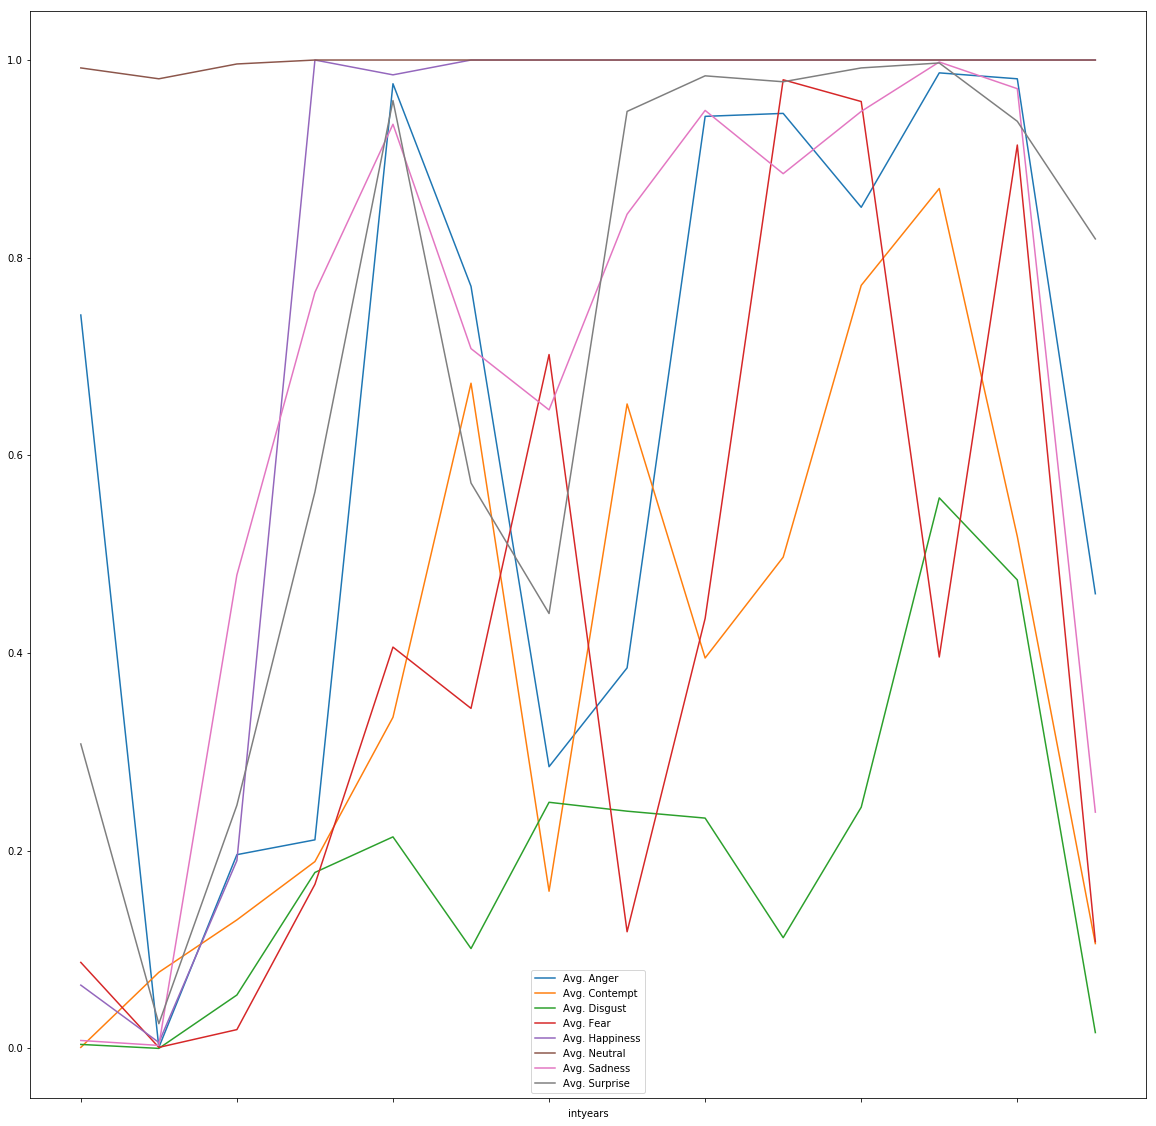

In [415]:
max_emotes.plot(figsize=(20,20)) #x axis may be off

more to come :)